In [1]:
import pandas as pd
import glob
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
# os.chdir("/Users/shounakrangwala/Desktop/analytics discovery informatics/Project/DataFiles")

In [3]:
play_df = pd.read_csv('kaggle.csv', low_memory = False)

In [4]:
play_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449371 entries, 0 to 449370
Columns: 255 entries, play_id to defensive_extra_point_conv
dtypes: float64(135), int64(18), object(102)
memory usage: 874.2+ MB


In [5]:
play_df = play_df.loc[play_df['game_id']>2014000000] ## using the last 5 years data (2014-2018)


In [6]:
features=['game_id','posteam','defteam','yardline_100','game_date','quarter_seconds_remaining','half_seconds_remaining','game_seconds_remaining','qtr','down','ydstogo','play_type','yards_gained','shotgun','no_huddle','score_differential','rush_attempt','pass_attempt']
# use only a certain number of attributes
play_df = play_df.loc[:,features]
    

In [7]:
play_df.columns

Index(['game_id', 'posteam', 'defteam', 'yardline_100', 'game_date',
       'quarter_seconds_remaining', 'half_seconds_remaining',
       'game_seconds_remaining', 'qtr', 'down', 'ydstogo', 'play_type',
       'yards_gained', 'shotgun', 'no_huddle', 'score_differential',
       'rush_attempt', 'pass_attempt'],
      dtype='object')

In [8]:
# cleaning including changing names, changing type of plays
teamNames = play_df.posteam.unique()
teamNames

array(['GB', 'SEA', nan, 'NO', 'ATL', 'MIN', 'STL', 'PIT', 'CLE', 'JAC',
       'PHI', 'NYJ', 'OAK', 'CIN', 'BAL', 'BUF', 'CHI', 'HOU', 'WAS',
       'KC', 'TEN', 'NE', 'MIA', 'CAR', 'TB', 'DAL', 'SF', 'IND', 'DEN',
       'DET', 'NYG', 'ARI', 'SD', 'LA', 'JAX', 'LAC'], dtype=object)

In [9]:
play_df.loc[play_df['posteam']=='STL', 'posteam'] = 'LAR'
play_df.loc[play_df['posteam']=='SD', 'posteam'] = 'LAC'
play_df.loc[play_df['posteam']=='LA', 'posteam'] = 'LAR'
play_df.loc[play_df['posteam']=='JAC', 'posteam'] = 'JAX'

play_df.loc[play_df['defteam']=='STL', 'defteam'] = 'LAR'
play_df.loc[play_df['defteam']=='SD', 'defteam'] = 'LAC'
play_df.loc[play_df['defteam']=='LA', 'defteam'] = 'LAR'
play_df.loc[play_df['defteam']=='JAC', 'defteam'] = 'JAX'


In [10]:
# count the number of Null values in all the columns
play_df.isna().sum()


game_id                          0
posteam                       7469
defteam                       7274
yardline_100                  7368
game_date                        0
quarter_seconds_remaining       81
half_seconds_remaining         105
game_seconds_remaining         103
qtr                              0
down                         34864
ydstogo                          0
play_type                     7274
yards_gained                     0
shotgun                          0
no_huddle                        0
score_differential            8535
rush_attempt                  7274
pass_attempt                  7274
dtype: int64

In [11]:
plays = play_df.play_type.unique()
plays

array(['kickoff', 'run', 'no_play', 'pass', 'punt', 'field_goal',
       'extra_point', nan, 'qb_kneel', 'qb_spike'], dtype=object)

In [12]:
# we want only runs or passes
play_df = play_df.loc[(play_df['rush_attempt']==1)|(play_df['pass_attempt']==1)]

In [13]:
play_df.isna().sum()


game_id                        0
posteam                        0
defteam                        0
yardline_100                   0
game_date                      0
quarter_seconds_remaining      0
half_seconds_remaining        17
game_seconds_remaining        14
qtr                            0
down                         430
ydstogo                        0
play_type                      0
yards_gained                   0
shotgun                        0
no_huddle                      0
score_differential             0
rush_attempt                   0
pass_attempt                   0
dtype: int64

In [14]:
downs = play_df.down.unique()
downs
# downs have a NaN value and all the down values are floats. So we have to convert them to int which will make it 0
d = play_df[play_df['down'].isnull()]

In [15]:
d 
# we cannot know which values are going to be in the place of NaN in the dataframe and since its only 430 values we can drop them

,game_id,posteam,defteam,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,qtr,down,ydstogo,play_type,yards_gained,shotgun,no_huddle,score_differential,rush_attempt,pass_attempt
225049,2014090400,GB,SEA,2.0,2014-09-04,571.0,571.0,571.0,4,NaN,0,pass,0.0,0,0,-13.0,0.0,1.0
225985,2014090706,NYJ,OAK,2.0,2014-09-07,483.0,483.0,483.0,4,NaN,0,pass,0.0,0,0,12.0,0.0,1.0
226189,2014090701,BAL,CIN,2.0,2014-09-07,346.0,346.0,346.0,4,NaN,0,run,0.0,0,0,1.0,1.0,0.0
226193,2014090701,CIN,BAL,2.0,2014-09-07,298.0,298.0,298.0,4,NaN,0,pass,2.0,0,0,5.0,0.0,1.0
227622,2014090800,DET,NYG,2.0,2014-09-08,279.0,279.0,279.0,4,NaN,0,pass,2.0,0,0,19.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447224,2018121603,GB,CHI,2.0,2018-12-16,250.0,1150.0,1150.0,3,NaN,0,pass,2.0,0,0,-2.0,0.0,1.0
447332,2018121602,DET,BUF,15.0,2018-12-16,645.0,645.0,2445.0,2,NaN,0,pass,0.0,0,0,6.0,0.0,1.0
447502,2018121601,TB,BAL,15.0,2018-12-16,728.0,728.0,2528.0,2,NaN,0,run,0.0,0,0,6.0,1.0,0.0
447714,2018121600,ATL,ARI,2.0,2018-12-16,13.0,13.0,1813.0,2,NaN,0,pass,0.0,0,0,18.0,0.0,1.0


In [16]:
play_df.dropna(inplace = True)

In [17]:
play_df = play_df.loc[(play_df['play_type']=='run')|(play_df['play_type']=='pass')]

In [18]:
play_df.shape

(158158, 18)

In [19]:
# add feature called first_down_dis : made from ydstogo so because the value range of ydstogo is a continuous range between
# 1-x where x can be any number  less than 100.
def first_down_convertor(x):
    if x['ydstogo']<3:
        category = 1
    elif x['ydstogo']<10 and x['ydstogo']>=4:
        category  = 2
    elif x['ydstogo']<15 and x['ydstogo']>=10:
        category = 3
    else:
        category = 4
    return category
play_df['first_down_dis'] = play_df.apply(first_down_convertor,axis=1)

In [20]:
# add feature called field goal range
# field_goal_range: 1 if within 25yards, 2: within 25-35 yards, 3:35-45, 5: outside for sure
field_goal_range=[]
arr = np.array(play_df['yardline_100'])
for rec in range(play_df.shape[0]):
#     print(play_df['yardline_100'][rec])
    if arr[rec]>45:
        field_goal_range.append('4')
    elif arr[rec]<=45 and arr[rec]>35:
        field_goal_range.append('3')
    elif arr[rec]<=35 and arr[rec]>25:
        field_goal_range.append('2')
    else:
        field_goal_range.append('1')
        
# print(field_goal_range)
play_df['Field_Goal_Range'] = field_goal_range

In [21]:
def encode_play(x):
    if x['play_type']=='pass':
        category=1
    else:
        category=0
    return category
# encode the run plays as 0 and pass plays as1
play_df['encoded_plays']=play_df.apply(encode_play,axis=1)

In [22]:
encoder  = LabelEncoder()
play_df['encoded_off_teams']= encoder.fit_transform(play_df['posteam'])
play_df['encoded_def_teams']= encoder.fit_transform(play_df['defteam'])

In [10]:
play_df.to_csv( "combined1.csv", index=False, encoding='utf-8-sig')

In [24]:
df = pd.read_csv('combined1.csv')

In [23]:
play_df

,game_id,posteam,defteam,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,qtr,down,...,shotgun,no_huddle,score_differential,rush_attempt,pass_attempt,first_down_dis,Field_Goal_Range,encoded_plays,encoded_off_teams,encoded_def_teams
224908,2014090400,GB,SEA,87.0,2014-09-04,896.0,1796.0,3596.0,1,1.0,...,0,0,0.0,1.0,0.0,3,4,0,11,27
224910,2014090400,GB,SEA,76.0,2014-09-04,851.0,1751.0,3551.0,1,1.0,...,1,0,0.0,1.0,0.0,3,4,0,11,27
224911,2014090400,GB,SEA,61.0,2014-09-04,812.0,1712.0,3512.0,1,1.0,...,0,1,0.0,1.0,0.0,3,4,0,11,27
224912,2014090400,GB,SEA,59.0,2014-09-04,786.0,1686.0,3486.0,1,2.0,...,1,0,0.0,0.0,1.0,2,4,1,11,27
224913,2014090400,GB,SEA,61.0,2014-09-04,750.0,1650.0,3450.0,1,3.0,...,1,0,0.0,0.0,1.0,3,4,1,11,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449363,2018121700,CAR,NO,71.0,2018-12-17,82.0,82.0,82.0,4,2.0,...,1,1,-5.0,0.0,1.0,1,4,1,4,21
449364,2018121700,CAR,NO,71.0,2018-12-17,77.0,77.0,77.0,4,3.0,...,1,0,-5.0,0.0,1.0,1,4,1,4,21
449366,2018121700,CAR,NO,66.0,2018-12-17,63.0,63.0,63.0,4,2.0,...,1,0,-5.0,0.0,1.0,3,4,1,4,21
449367,2018121700,CAR,NO,66.0,2018-12-17,58.0,58.0,58.0,4,3.0,...,1,0,-5.0,0.0,1.0,3,4,1,4,21


In [25]:
df

,game_id,posteam,defteam,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,qtr,down,...,shotgun,no_huddle,score_differential,rush_attempt,pass_attempt,Field_Goal_Range,first_down_dis,encoded_plays,encoded_off_teams,encoded_def_teams
0,2014090400,GB,SEA,87.0,2014-09-04,896.0,1796.0,3596.0,1,1.0,...,0,0,0.0,1.0,0.0,4,3,0,11,27
1,2014090400,GB,SEA,76.0,2014-09-04,851.0,1751.0,3551.0,1,1.0,...,1,0,0.0,1.0,0.0,4,3,0,11,27
2,2014090400,GB,SEA,61.0,2014-09-04,812.0,1712.0,3512.0,1,1.0,...,0,1,0.0,1.0,0.0,4,3,0,11,27
3,2014090400,GB,SEA,59.0,2014-09-04,786.0,1686.0,3486.0,1,2.0,...,1,0,0.0,0.0,1.0,4,2,1,11,27
4,2014090400,GB,SEA,61.0,2014-09-04,750.0,1650.0,3450.0,1,3.0,...,1,0,0.0,0.0,1.0,4,3,1,11,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158153,2018121700,CAR,NO,71.0,2018-12-17,82.0,82.0,82.0,4,2.0,...,1,1,-5.0,0.0,1.0,4,1,1,4,21
158154,2018121700,CAR,NO,71.0,2018-12-17,77.0,77.0,77.0,4,3.0,...,1,0,-5.0,0.0,1.0,4,1,1,4,21
158155,2018121700,CAR,NO,66.0,2018-12-17,63.0,63.0,63.0,4,2.0,...,1,0,-5.0,0.0,1.0,4,3,1,4,21
158156,2018121700,CAR,NO,66.0,2018-12-17,58.0,58.0,58.0,4,3.0,...,1,0,-5.0,0.0,1.0,4,3,1,4,21


In [26]:
import seaborn as sn

In [27]:
import matplotlib.pyplot as plt

In [28]:
corrMatrix = df.corr()

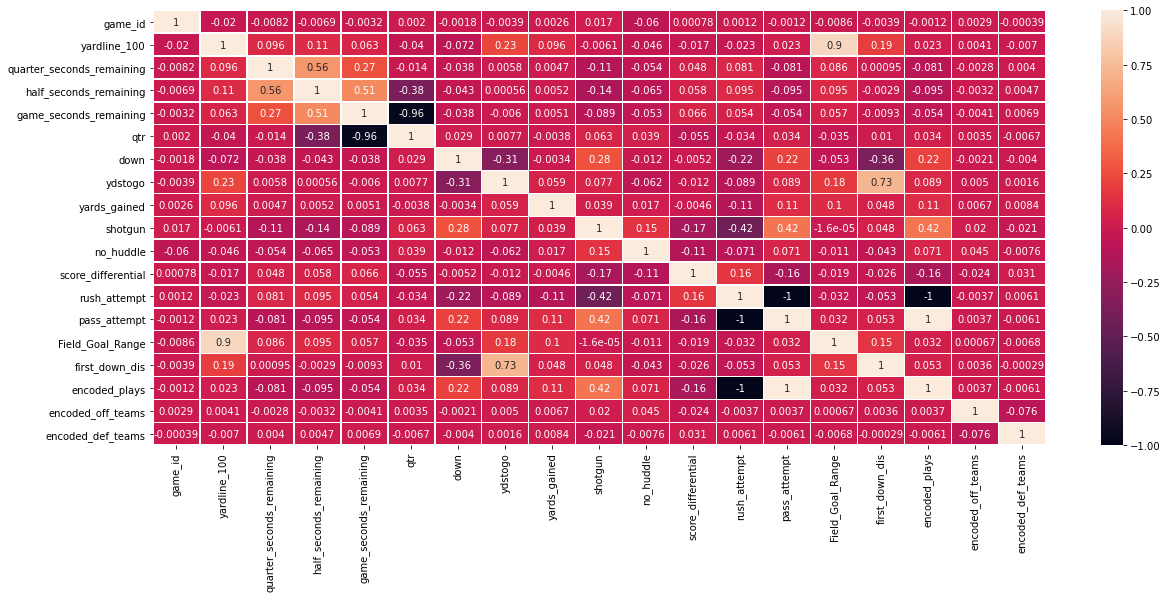

In [34]:
fig, ax = plt.subplots(figsize=(20,8))         # Sample figsize in inches
sn.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
# sn.heatmap(corrMatrix, annot=True)
plt.show()